<a href="https://colab.research.google.com/github/RiddhimanRaut/Deep-Learning-based-CPR-estimation/blob/main/CPRAVG_ARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
%pip install pmdarima

In [28]:
import pandas as pd
path = "https://github.com/RiddhimanRaut/Deep-Learning-based-CPR-estimation/blob/main/excel_dataset.xlsx?raw=true"
df = pd.read_excel(path)
df.head()

,Date Time,CPRAVG,PROP,BUT,ETHYLENE,AI12201M,FLW,COT,TEMP,PRESS,O2,DRAFT,ETH
0,01.01.2009 00:10:00,0.428151,18.960609,3.973630,29.732470,0.014431,30711.65039,820.118210,632.399261,0.466357,1.444160,-5.616851,75.809700
1,01.01.2009 00:20:00,0.427783,18.960360,3.973562,30.123590,0.014822,30700.66016,819.662811,633.057602,0.475288,1.413894,-5.540349,75.810066
2,01.01.2009 00:30:00,0.427432,19.009649,4.181924,30.477831,0.012689,30689.66016,819.886444,631.841385,0.464559,1.515123,-5.628389,75.552841
3,01.01.2009 00:40:00,0.427082,19.155710,3.950392,30.425819,0.012580,30678.66016,819.660172,632.495224,0.471809,1.404055,-5.576591,75.580223
4,01.01.2009 00:50:00,0.426732,19.334640,3.689848,30.546061,0.012472,30667.66016,819.646805,632.388214,0.470504,1.191485,-5.274679,75.638023


In [29]:
#Making Date Time our index
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
df.index = date_time
df.head()

,CPRAVG,PROP,BUT,ETHYLENE,AI12201M,FLW,COT,TEMP,PRESS,O2,DRAFT,ETH
Date Time,,,,,,,,,,,,
2009-01-01 00:10:00,0.428151,18.960609,3.973630,29.732470,0.014431,30711.65039,820.118210,632.399261,0.466357,1.444160,-5.616851,75.809700
2009-01-01 00:20:00,0.427783,18.960360,3.973562,30.123590,0.014822,30700.66016,819.662811,633.057602,0.475288,1.413894,-5.540349,75.810066
2009-01-01 00:30:00,0.427432,19.009649,4.181924,30.477831,0.012689,30689.66016,819.886444,631.841385,0.464559,1.515123,-5.628389,75.552841
2009-01-01 00:40:00,0.427082,19.155710,3.950392,30.425819,0.012580,30678.66016,819.660172,632.495224,0.471809,1.404055,-5.576591,75.580223
2009-01-01 00:50:00,0.426732,19.334640,3.689848,30.546061,0.012472,30667.66016,819.646805,632.388214,0.470504,1.191485,-5.274679,75.638023


In [30]:
#Dropping Unimportant Columns:
df.drop(['ETHYLENE','AI12201M','O2'],axis = 1, inplace=True)
df.head()

,CPRAVG,PROP,BUT,FLW,COT,TEMP,PRESS,DRAFT,ETH
Date Time,,,,,,,,,
2009-01-01 00:10:00,0.428151,18.960609,3.973630,30711.65039,820.118210,632.399261,0.466357,-5.616851,75.809700
2009-01-01 00:20:00,0.427783,18.960360,3.973562,30700.66016,819.662811,633.057602,0.475288,-5.540349,75.810066
2009-01-01 00:30:00,0.427432,19.009649,4.181924,30689.66016,819.886444,631.841385,0.464559,-5.628389,75.552841
2009-01-01 00:40:00,0.427082,19.155710,3.950392,30678.66016,819.660172,632.495224,0.471809,-5.576591,75.580223
2009-01-01 00:50:00,0.426732,19.334640,3.689848,30667.66016,819.646805,632.388214,0.470504,-5.274679,75.638023


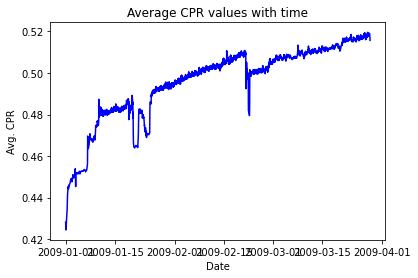

In [31]:
#Plotting the CPRAVG data
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Average CPR values with time')
plt.xlabel('Date')
plt.ylabel('Avg. CPR')
plt.plot(df['CPRAVG'],color = 'blue')

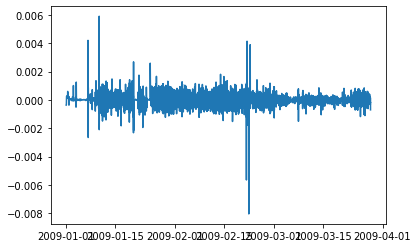

In [32]:
#Differencing the data.
diff_df = df['CPRAVG'].diff()
plt.plot(diff_df)

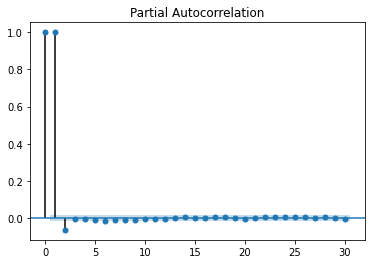

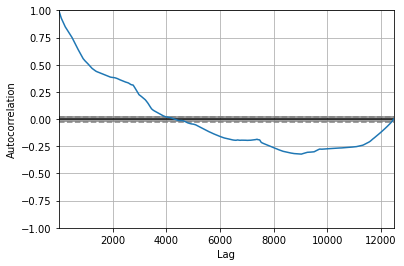

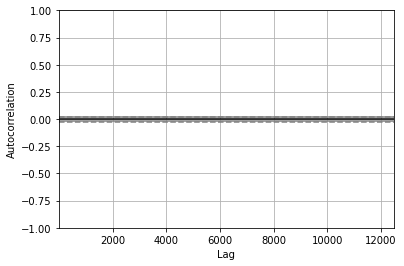

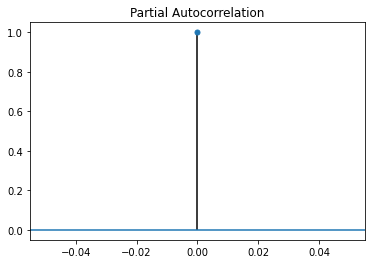

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
plot_pacf(df['CPRAVG'],lags = 30)
plt.show()
#p = 3
autocorrelation_plot(df['CPRAVG'])
plt.show()
#q = 4000

autocorrelation_plot(diff_df)
plt.show()

plot_pacf(diff_df, lags = 30)
plt.show()

Now we will create our ARIMAX model. Note that we do not have seasonal data. So we shall remove the seasonal_order parameter from our method, and we are good to go!

In [34]:
#Printing list of columns:
cols = list(df)[0:df.shape[1]]
print(cols)

['CPRAVG', 'PROP', 'BUT', 'FLW', 'COT', 'TEMP', 'PRESS', 'DRAFT', 'ETH']


In [42]:
#Splitting the data:
split_length = 0.7
train_df = df[0:int(split_length*df.shape[0])]
val_df = df[int(split_length*df.shape[0]):df.shape[0]]
print(val_df)

                       CPRAVG       PROP  ...     DRAFT        ETH
Date Time                                 ...                     
2009-03-02 14:40:00  0.506219  17.881880  ... -4.436426  77.313217
2009-03-02 14:50:00  0.506382  17.881981  ... -4.402922  77.313408
2009-03-02 15:00:00  0.506386  17.881889  ... -4.426479  77.313408
2009-03-02 15:10:00  0.506348  17.882130  ... -4.395713  77.313271
2009-03-02 15:20:00  0.506194  17.881729  ... -4.399864  77.313271
...                       ...        ...  ...       ...        ...
2009-03-28 13:20:00  0.516947  22.566521  ... -4.964487  72.158081
2009-03-28 13:30:00  0.516790  23.644880  ... -4.957215  71.223877
2009-03-28 13:40:00  0.516591  23.736650  ... -4.961114  70.807220
2009-03-28 13:50:00  0.516339  23.319229  ... -4.955902  71.450020
2009-03-28 14:00:00  0.515635  22.664320  ... -4.967060  72.160553

[3741 rows x 9 columns]


In [36]:
#Creating ARIMAX model:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Creating the exog dataframe
arimax_model = SARIMAX(train_df['CPRAVG'], order = (2,0,2), exog = train_df[['PROP', 'BUT', 'FLW', 'COT', 'TEMP', 'PRESS', 'DRAFT', 'ETH']])

# import pmdarima as pm
# arimax_model = pm.auto_arima(train_df['CPRAVG'], 
#                              exogenous = train_df[['PROP', 'BUT', 'FLW', 'COT', 'TEMP', 'PRESS', 'DRAFT', 'ETH']],
#                              start_p = 1,
#                              start_q = 1,
#                              max_p=3,
#                              max_q=3, 
#                              test='adf',
#                              suppress_warnings=True, 
#                              seasonal=False,
#                              m = 1,
#                              d = None,
#                              stepwise = True)
# arimax_model.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  % freq, ValueWarning)


Model has been created! Let's fit it.

In [ ]:
res = arimax_model.fit(maxiter = 200,
                       method = 'powell',
                       disp = False)

Once that is done, we shall have a look at the model summary.

In [38]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 CPRAVG   No. Observations:                 8727
Model:               SARIMAX(2, 0, 2)   Log Likelihood               39790.281
Date:                Mon, 02 Aug 2021   AIC                         -79554.561
Time:                        03:01:25   BIC                         -79462.597
Sample:                    01-01-2009   HQIC                        -79523.220
                         - 03-02-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PROP           0.0005   6.72e-05      7.608      0.000       0.000       0.001
BUT           -0.0140      0.000    -86.679      0.000      -0.014      -0.014
FLW        -7.016e-06   1.39e-07    -50.318      0.000   -7.29e-06   -6.74e-06
COT            0.0008   2.81e-05     29.130      0.000       0.001       0.001
TEMP         4.14e-05   3.13e-05      1.321      0.186      -2e-05       0.000
PRESS          0.0715      0.004     18.503      0.000       0.064       0.079
DRAFT         -0.0106      0.001    -20.151      0.000      -0.012      -0.010
ETH           -0.0010    5.9e-05    -17.106      0.000      -0.001      -0.001
ar.L1          0.8318      0.040     20.593      0.000       0.753       0.911
ar.L2          0.1578      0.040      3.947      0.000       0.079       0.236
ma.L1         -0.3066      0.042     -7.361      0.000      -0.388      -0.225
ma.L2         -0.1751      0.021     -8.191      0.000      -0.217      -0.133
sigma2      6.407e-06   1.36e-07     46.997      0.000    6.14e-06    6.67e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):            476286.06
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               2.65   Skew:                             0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        39.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

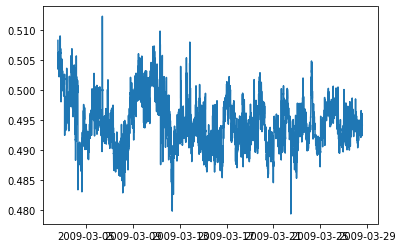

In [41]:
# forecast = arimax_model.predict(n_periods=val_df.shape[0], dynamic = True, exogenous = val_df[['PROP', 'BUT', 'FLW', 'COT', 'TEMP', 'PRESS', 'DRAFT', 'ETH']])
start = train_df.shape[0]
end = df.shape[0] - 1
forecast = res.predict(start = start, end = end, dynamic = False, exog = val_df[['PROP', 'BUT', 'FLW', 'COT', 'TEMP', 'PRESS', 'DRAFT', 'ETH']])
plt.plot(forecast)